<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience/blob/main/Notebook_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

## ✏️ Ejercitación: Aprendizaje No Supervisado

Esta notebook les permitiria ejercitar los conceptos de aprendizaje automatico no supervisado que hemos aprendimos.

En este caso, vamos a trabajar con el dataset que usamos anteriormente relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers) y que luego de procesar, guardamos oportunamente.

El objetivo de este projecto es ajustar modelos de aprendizaje no supervisado. Luego, realicen la evaluación de los modelos y decidan porque elegirian uno sobre el otro.

### 🚀 👩🏽‍💻 Aprendizaje No Supervisado 📣

## Clustering: Kmeans 🧩

Si aún no lo hicieron, pueden realizar una exploración de los datos para poder visualizar la distribución de las variables y la correlación entre ellas.

Esto es porque para poder aplicar K-means, los datos deben cumplir ciertos requerimientos:

- **Forma de los clusters**: La varianza de la distribución es esferica. Lo que significa que los clusters tienen una forma esferica. Lo que significa que si las variables tienen varianzas similares y siguen una distribución normal, es más factible que este supuesto se cumpla.
- **Tamaño de los clusters**: Todos los clusters deben tener el mismo numero (o muy similar) de observaciones
- **Relación entre las variables**: Existe poca o ninguna correlación entre las variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
from sklearn.cluster import KMeans

In [6]:
x1=df['Annual Income (k$)']
x2=df['Spending Score (1-100)']


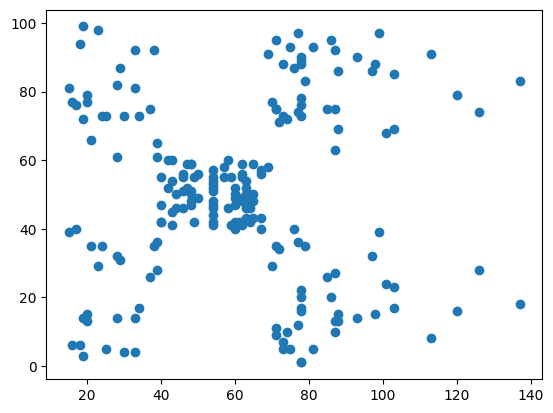

In [7]:
plt.scatter(x1,x2)

#### Crea tres modelos usando k=2, k=6, k=9

In [8]:
data=pd.DataFrame({'x1':x1,'x2':x2})

In [9]:
first_kmeans = KMeans(n_clusters=2, random_state=0)
sec_kmeans = KMeans(n_clusters=6, random_state=0)
thr_kmeans = KMeans(n_clusters=9, random_state=0)

In [10]:
first_kmeans.fit(data)

KMeans(n_clusters=2, random_state=0)

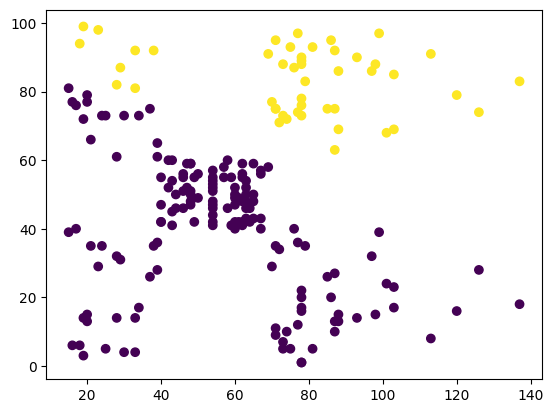

In [11]:
plt.scatter(data['x1'],data['x2'],c=first_kmeans.labels_)

In [12]:
sec_kmeans.fit(data)

KMeans(n_clusters=6, random_state=0)

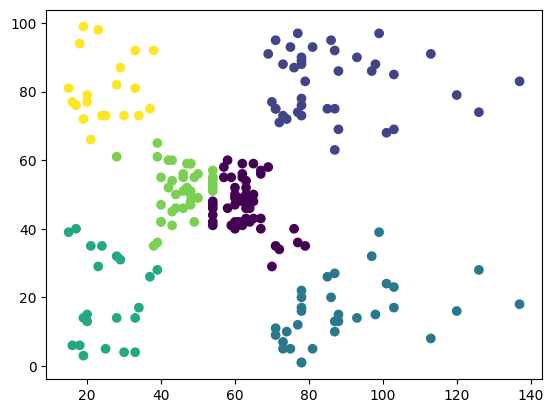

In [13]:
plt.scatter(data['x1'],data['x2'],c=sec_kmeans.labels_)

In [14]:
thr_kmeans.fit(data)

KMeans(n_clusters=9, random_state=0)

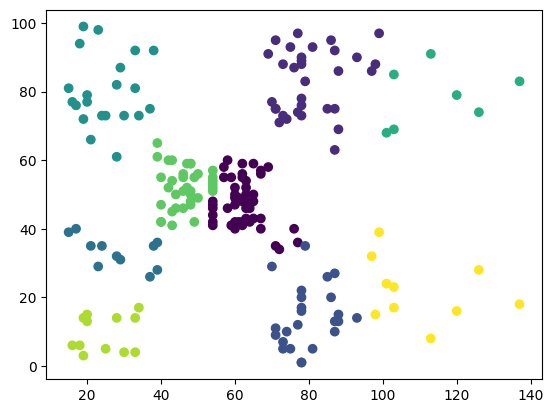

In [15]:
plt.scatter(data['x1'],data['x2'],c=thr_kmeans.labels_)

In [16]:
data.head()

,x1,x2
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
first_centroids=first_kmeans.cluster_centers_
sec_centroids=sec_kmeans.cluster_centers_
thr_centroids=thr_kmeans.cluster_centers_

In [18]:
etiquetas_1 = first_kmeans.labels_
etiquetas_2 = sec_kmeans.labels_
etiquetas_3 = thr_kmeans.labels_

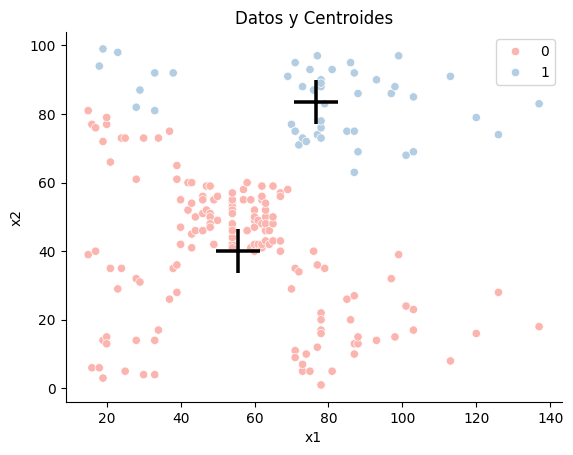

In [19]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_1, palette='Pastel1')
sns.scatterplot(x=first_centroids[:, 0], y=first_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

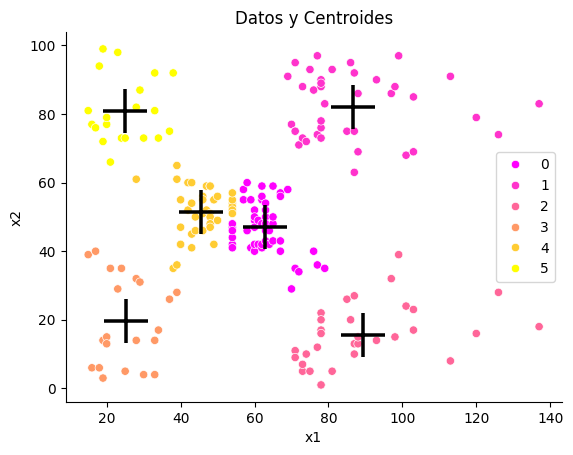

In [20]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_2, palette='spring')
sns.scatterplot(x=sec_centroids[:, 0], y=sec_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

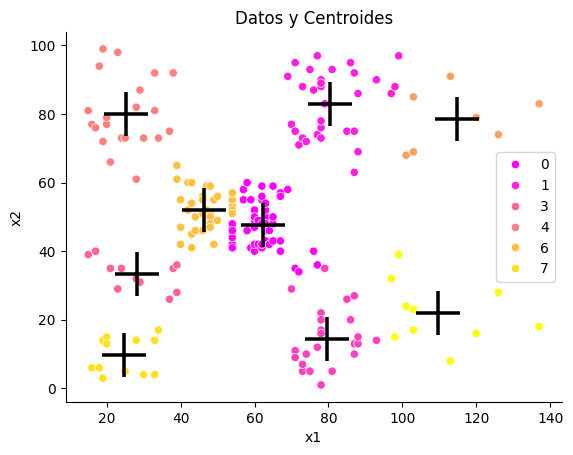

In [21]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_3, palette='spring')
sns.scatterplot(x=thr_centroids[:, 0], y=thr_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

¿Crees que el resultado es satisfactorio?

Resultado elegido

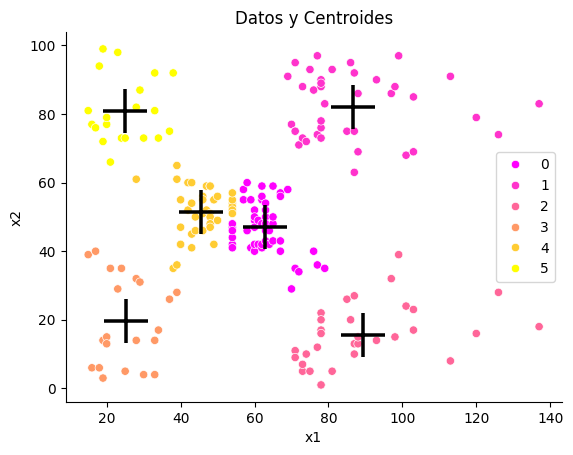

In [22]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_2, palette='spring')
sns.scatterplot(x=sec_centroids[:, 0], y=sec_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

#### Metodos para elegir K

Aplica los métodos que conoces y elige el k que mejor se ajusta a los datos.

**Metodo Silhouette**

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    sil.append(silhouette_score(data, labels, metric='euclidean'))

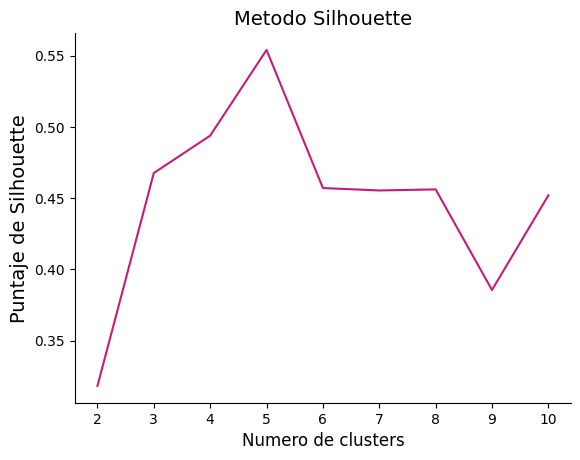

In [25]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

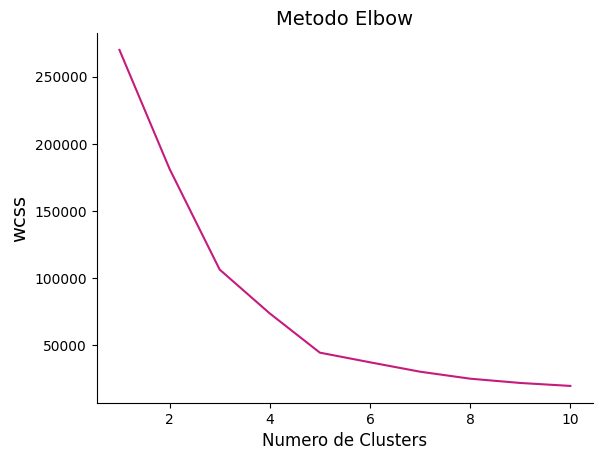

In [26]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

#### Ajusta el modelo usando el K seleccionado

In [27]:
nuevo_k = KMeans(n_clusters=5, random_state=0)

In [28]:
nuevo_k.fit(data)

KMeans(n_clusters=5, random_state=0)

In [29]:
centroide = nuevo_k.cluster_centers_

In [30]:
etiquetas_nueva = nuevo_k.labels_

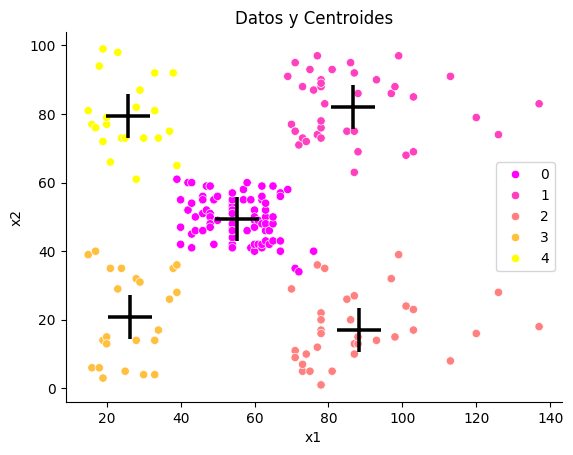

In [31]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_nueva, palette='spring')
sns.scatterplot(x=centroide[:, 0], y=centroide[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

### **Reducción de la dimensionalidad**

### **Principal Component Analysis**

Prueba ahora reduciendo la dimensionalidad y ajustando K-means nuevamente.

PCA es uno de los algortimos más utilizados para reducir la dimensionalidad de un dataset. Cuando aumenta la dimensionalidad de los datos, el volumen del espacio aumenta exponencialmente, haciendo que los datos disponibles se encuentren más dispersos.

El PCA selecciona las direcciones con mayor variabilidad. Permitiendo eliminar las direcciones con menor variabilidad, ya que poseen menos información.

In [32]:
from sklearn.decomposition import PCA

In [38]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


In [46]:
pca_df.head()

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


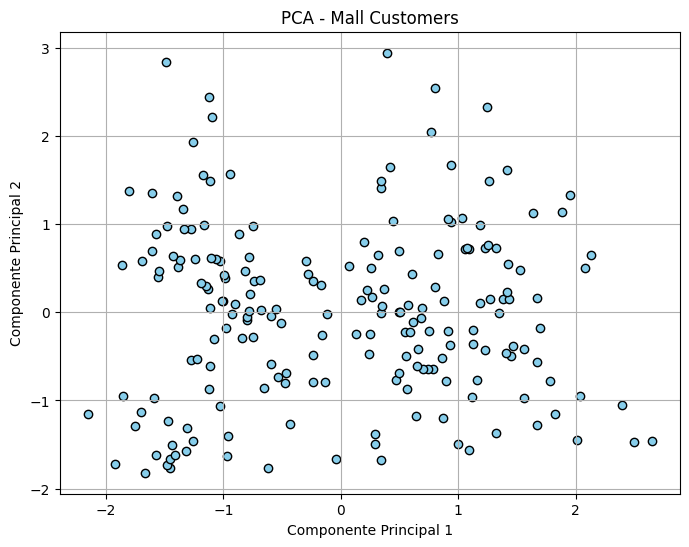

In [43]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='skyblue', edgecolor='k')

# Agregar etiquetas y título
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Mall Customers')

plt.grid(True)
plt.show()


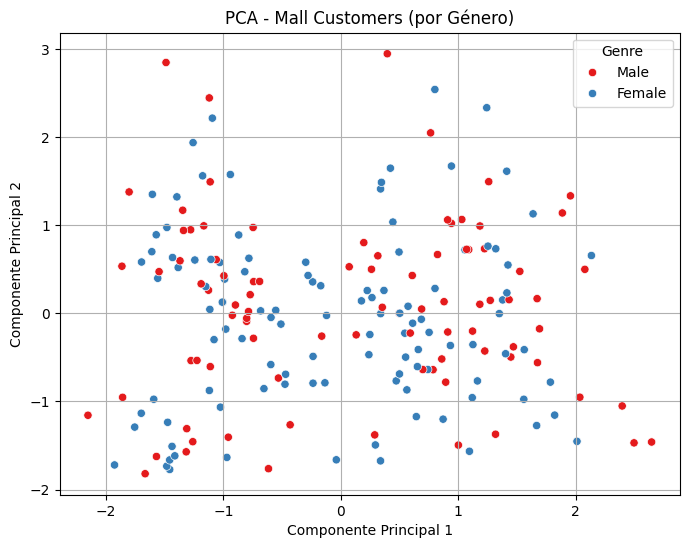

In [45]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pd.concat([df, pca_df], axis=1), x='PC1', y='PC2', hue='Genre', palette='Set1')

plt.title('PCA - Mall Customers (por Género)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


#### Varianza explicada

In [48]:
from sklearn.decomposition import PCA

# Aplicamos PCA con todos los componentes posibles
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Varianza explicada acumulada
cumulative_variance = explained_variance.cumsum()

# Mostramos los resultados
print('Varianza explicada')
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"Componente {i}: {var:.4f} - Acumulada: {cum_var:.4f}")


Varianza explicada
Componente 1: 0.4427 - Acumulada: 0.4427
Componente 2: 0.3331 - Acumulada: 0.7757
Componente 3: 0.2243 - Acumulada: 1.0000


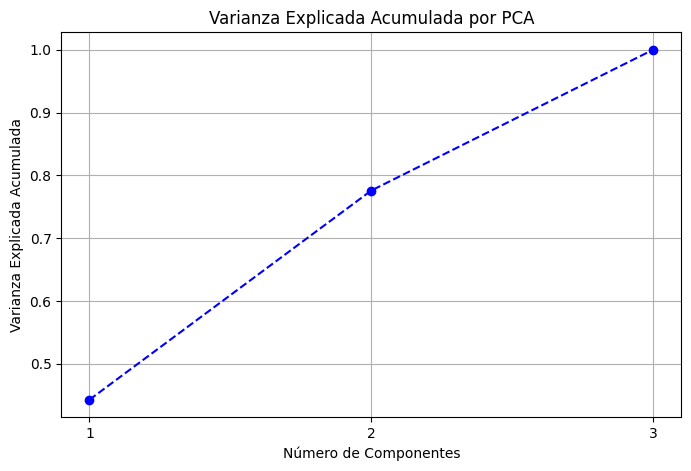

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


In [52]:
df_full = pd.concat([df, pca_df], axis=1)


/tmp/ipython-input-53-2110849608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_full, x='Genre', y='PC1', jitter=True, palette='Set2')


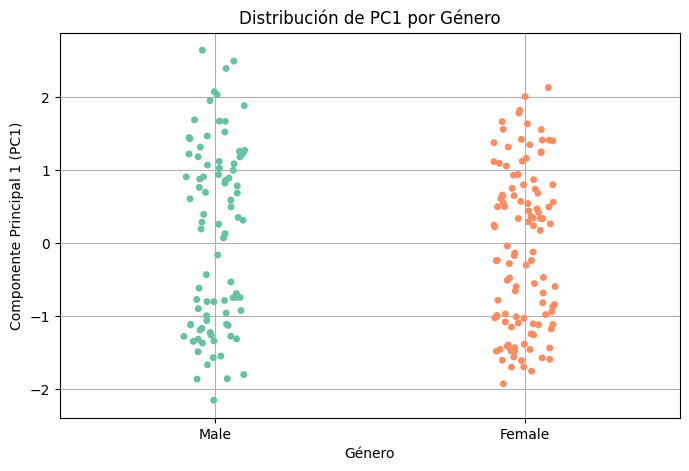

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.stripplot(data=df_full, x='Genre', y='PC1', jitter=True, palette='Set2')

plt.title('Distribución de PC1 por Género')
plt.xlabel('Género')
plt.ylabel('Componente Principal 1 (PC1)')
plt.grid(True)
plt.show()


## **Clustering: DBSCAN** 🧩

¿Y si comparamos con ajustar un modelo de DBSCAN?

In [54]:
from sklearn.cluster import DBSCAN

# Aplicamos DBSCAN sobre los componentes principales
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajustá estos parámetros si querés
clusters = dbscan.fit_predict(pca_df)

# Agregamos los clusters al DataFrame
df_full['Cluster_DBSCAN'] = clusters


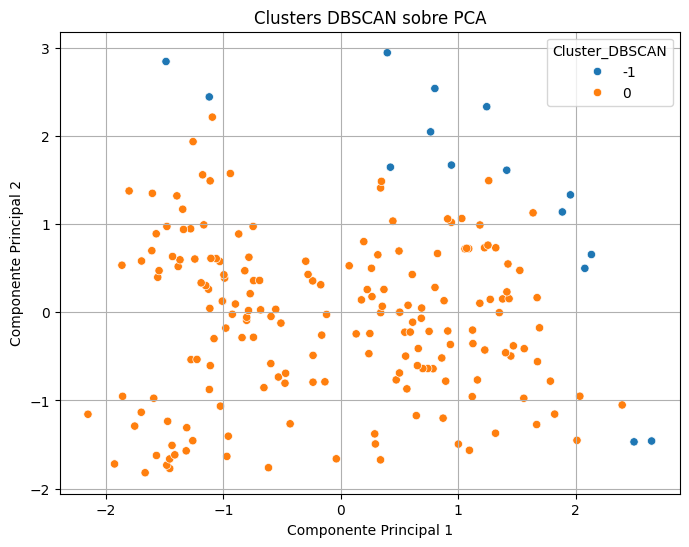

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_full, x='PC1', y='PC2', hue='Cluster_DBSCAN', palette='tab10', legend='full')

plt.title('Clusters DBSCAN sobre PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


¿Qué opinan? ¿Qué modelo arrojo mejores resultados de clustering?